In [30]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, UpSampling2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
(x_train,_),(x_test,_) = mnist.load_data()

In [33]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = np.reshape(x_train, (len(x_train),28,28,1))
x_test = np.reshape(x_test, (len(x_test),28,28,1))

In [34]:
#adding some noises
noise_factor=0.5
x_train_noisy = x_train+ noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size = x_test.shape)
x_train_noisy= np.clip(x_train_noisy,0. , 1.) #it will clip all the value outside the range o-1
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


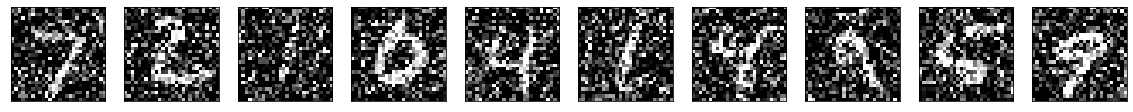

In [35]:
#display the noisy images
n=10
plt.figure(figsize=(20,2))
for i in range(n):
    ax= plt.subplot(1,n , 1+i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.plot()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

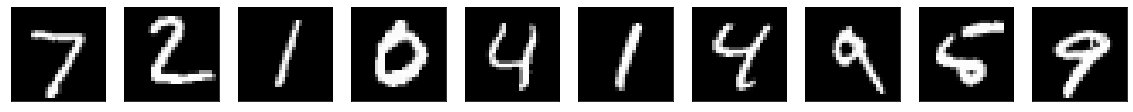

In [36]:
n=10
plt.figure(figsize=(20,2))
for i in range(n):
    ax= plt.subplot(1,n , 1+i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.plot()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Create a model

In [38]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation = 'relu', padding='same'))
model.add(MaxPooling2D((2,2),padding="same"))

model.add(Conv2D(8,(3,3), activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3), activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1, (3,3),activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 8)          

In [39]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size= 256, shuffle=True, validation_data=(x_test_noisy, x_test))
model.evaluate(x_test_noisy, x_test)

Epoch 1/10
235/235 [==============================] - 64s 274ms/step - loss: 0.0580 - val_loss: 0.0427
Epoch 2/10
235/235 [==============================] - 64s 271ms/step - loss: 0.0385 - val_loss: 0.0346
Epoch 3/10
235/235 [==============================] - 70s 296ms/step - loss: 0.0332 - val_loss: 0.0314
Epoch 4/10
235/235 [==============================] - 68s 290ms/step - loss: 0.0304 - val_loss: 0.0290
Epoch 5/10
235/235 [==============================] - 68s 287ms/step - loss: 0.0285 - val_loss: 0.0274
Epoch 6/10
235/235 [==============================] - 67s 286ms/step - loss: 0.0271 - val_loss: 0.0261
Epoch 7/10
235/235 [==============================] - 68s 291ms/step - loss: 0.0261 - val_loss: 0.0252
Epoch 8/10
235/235 [==============================] - 67s 284ms/step - loss: 0.0252 - val_loss: 0.0244
Epoch 9/10
235/235 [==============================] - 66s 280ms/step - loss: 0.0245 - val_loss: 0.0238
Epoch 10/10
313/313 [==============================] - 3s 8ms/step - loss

0.023374944925308228

313/313 [==============================] - 2s 8ms/step - loss: 0.0234
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: noising_denoising_model.model\assets


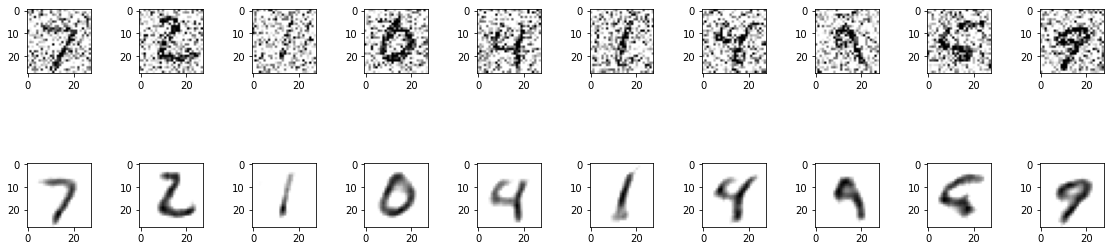

In [40]:
model.evaluate(x_test_noisy, x_test)
model.save('noising_denoising_model.model')
no_noise_img= model.predict(x_test_noisy)

plt.figure(figsize=(40,4))
for i in range(10):
    ax = plt.subplot(3,20,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28),cmap='binary')
    #display reconstructe images
    ax= plt.subplot(3,20, 40+i+1)
    plt.imshow(no_noise_img[i].reshape(28,28),cmap='binary')

plt.show()